# Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by 
the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others.
The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

# read dataset

In [2]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore")
A=pd.read_csv("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/training_set.csv")


In [3]:
A.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,NaN,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,NaN,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
A=A.replace(to_replace='3+',value=4)

In [7]:
A.Dependents

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [8]:
A['Dependents']=A['Dependents'].astype(float)
print(A.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Define Fuctions

In [9]:
def catconsep(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [10]:
def replacer(df):
    cat,con = catconsep(df)
    for i in con:
        x = df[i].mean()
        df[i]=df[i].fillna(x)

    for i in cat:
        x = df[i].mode()[0]
        df[i]=df[i].fillna(x)

In [11]:
def standardize(df):
    import pandas as pd
    cat,con = catconsep(df)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    return X1

In [12]:
def outliers(df):
    df = standardize(df)
    outliers = []
    cat,con = catconsep(df)
    for i in con:
        outliers.extend(list(df[df[i]>3].index))
        outliers.extend(list(df[df[i]<-3].index))
    from numpy import unique
    Q = list(unique(outliers))
    return Q

In [13]:
def preprocessing(df):
    cat,con = catconsep(df)
    from sklearn.preprocessing import MinMaxScaler
    ss = MinMaxScaler()
    import pandas as pd
    X1 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X2 = pd.get_dummies(df[cat])
    Xnew = X1.join(X2)
    return Xnew

In [83]:
def ANOVA(df,cat,con):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    eqn = str(con) + " ~ " + str(cat)
    model = ols(eqn,df).fit()
    from statsmodels.stats.anova import anova_lm
    Q = anova_lm(model)
    return round(Q.iloc[0:1,4:5].values[0][0],5)

In [15]:
def chisq(df,cat1,cat2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return round(b,5)

# missing data tretment

In [16]:
Q=A.isna().sum()
Q[Q>0]

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [17]:
replacer(A)

In [18]:
Q=A.isna().sum()
Q[Q>0]

Series([], dtype: int64)

# outliers

In [19]:
A.shape

(614, 13)

In [20]:
out=outliers(A)
len(out)

37

In [21]:
A=A.drop(index=out,axis=0)

In [22]:
A.index=range(0,A.shape[0],1)

In [23]:
A.shape

(577, 13)

# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

In [24]:
A.nunique()

Loan_ID              577
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      474
CoapplicantIncome    274
LoanAmount           185
Loan_Amount_Term       6
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

# X and Y define

In [25]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)

# cat,con seprater

In [26]:
cat,con=catconsep(X)
cat,con

(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'],
 ['Dependents',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [27]:
con.remove("Credit_History")
cat.append("Credit_History")

In [28]:
con

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [29]:
cat

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

# Visulization

# ANOVA

In [79]:
Q = ["Dependents",
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term"]
for i in Q:
    print(i,ANOVA(A,"Loan_Status",i))

Dependents 0.86385
ApplicantIncome 0.89434
CoapplicantIncome 0.28206
LoanAmount 0.3975
Loan_Amount_Term 0.66362


# Chisquare test

In [32]:
Q = ["Loan_ID",
      "Gender",
      "Married",
      "Education",
      "Self_Employed",
       "Property_Area",
       "Credit_History"]
for i in Q:
    print(i,chisq(A,"Loan_Status",i))

Loan_ID 0.48043
Gender 0.76236
Married 0.04094
Education 0.03415
Self_Employed 0.61581
Property_Area 0.00232
Credit_History 0.0


# preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.693383,0.398479,-0.860843,0.184585,0.239408,1.0,0,1,1,0,1,0,1,0,0,0,1
1,0.154749,0.248823,0.053073,-0.143355,0.239408,1.0,0,1,0,1,1,0,1,0,1,0,0
2,-0.693383,-0.562989,-0.860843,-1.247642,0.239408,1.0,0,1,0,1,1,0,0,1,0,0,1


# split

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# crete model function

In [35]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    return tr_acc,ts_acc

# KNN model

In [36]:
import numpy as np
xtrain = np.ascontiguousarray(xtrain)
xtest = np.ascontiguousarray(xtest)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
modeller(knn)

(0.78, 0.68)

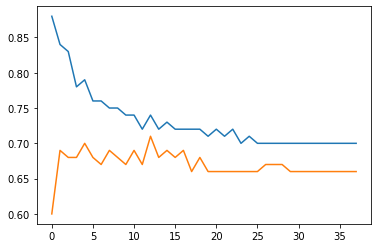

In [38]:
tr = []
ts = []
for i in range(2,40,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    t1,t2=modeller(knn)
    tr.append(t1)
    ts.append(t2)
    
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
modeller(knn)

(0.78, 0.68)

# logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeller(lr)

(0.81, 0.84)

# Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=31)
modeller(dtc)

(1.0, 0.72)

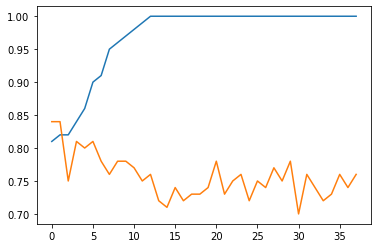

In [42]:
tr = []
ts = []
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(max_depth=i)
    t1,t2=modeller(dtc)
    tr.append(t1)
    ts.append(t2)
    
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
modeller(dtc)

(0.82, 0.84)

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=31)
modeller(rfc)

(1.0, 0.81)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15,max_depth=2)
modeller(rfc)

(0.81, 0.81)

# AdaBoost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=31,max_depth=2),n_estimators=10)
modeller(abc)

(0.86, 0.79)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=31,max_depth=2),n_estimators=2)
modeller(abc)

(0.81, 0.84)

# Model Result

KNN= 0.81, 0.79

logistic regression= 0.81, 0.84

Decision tree= 0.82, 0.84

Random Forest Classifier= 0.78, 0.78

AdaBoost Classifier= 0.81, 0.84

# Train the model with entire Data

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
model=dtc.fit(Xnew,Y)

# test prediction

In [49]:
B=pd.read_csv("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/testing_set.csv")

In [50]:
B.head(2)  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [51]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [52]:
B=B.replace(to_replace='3+',value=4)

In [53]:
B['Dependents']=B['Dependents'].astype(float)
print(B.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


# NA values in test set

In [54]:
for i in B.columns:
    if(B[i].dtype=="object"):  ##B column
        X=A[i].mode()[0]   ##A colm mode
        B[i]=B[i].fillna(X) ##fill in B
    else:
        X=A[i].mean()  ## A mean fill in B
        B[i]=B[i].fillna(X)

In [55]:
Q=B.isna().sum()
Q[Q>0]

Series([], dtype: int64)

In [56]:
Q=B.drop(labels=["Loan_ID","Gender"],axis=1)
Q.head(1)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [57]:
cat,con=catconsep(Q)
cat,con

(['Married', 'Education', 'Self_Employed', 'Property_Area'],
 ['Dependents',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [58]:
con.remove("Credit_History")
cat.append("Credit_History")

In [59]:
cat

['Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

# preprocessing of test set

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X11=pd.DataFrame(ss.fit_transform(Q[con]),columns=con)
X21=pd.get_dummies(Q[cat])
Xnew2=X11.join(X21)

In [61]:
Xnew2.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.722742,0.186461,-0.673335,-0.429349,0.269306,1.0,0,1,1,0,1,0,0,0,1
1,0.047930,-0.352692,-0.029848,-0.166463,0.269306,1.0,0,1,1,0,1,0,0,0,1


# Prediction

In [62]:
#Dependents', 'Gender_Female', 'Gender_Male

In [63]:
len(Xnew.columns),len(Xnew2.columns)

(17, 15)

In [64]:
Xnew2['Dependents']=0
Xnew2['Gender_Female']=0
Xnew2['Gender_Male']=0

In [65]:
final_DF = Xnew2[Xnew.columns]
final_DF.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.186461,-0.673335,-0.429349,0.269306,1.0,0,0,0,1,1,0,1,0,0,0,1


In [66]:
pred = model.predict(final_DF)
final=pd.DataFrame(pred)
final.columns=['Loan_Status']
final['Loan_ID']=B.Loan_ID

In [67]:
final=final[["Loan_ID","Loan_Status"]]
final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# New DF with Result

In [68]:
B1=B
B1['Loan_Status']=pred
B1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,0.838646,Urban,Y
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
5,LP001054,Male,Yes,0.0,Not Graduate,Yes,2165,3422,152.0,360.0,1.000000,Urban,Y
6,LP001055,Female,No,1.0,Not Graduate,No,2226,0,59.0,360.0,1.000000,Semiurban,Y
7,LP001056,Male,Yes,2.0,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
8,LP001059,Male,Yes,2.0,Graduate,No,13633,0,280.0,240.0,1.000000,Urban,Y
9,LP001067,Male,No,0.0,Not Graduate,No,2400,2400,123.0,360.0,1.000000,Semiurban,Y


In [69]:
B1.to_csv("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/loan_file.csv")

In [70]:
import pickle as p

In [71]:
p.dump(model,open("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/Model1.pkl","wb"))

In [72]:
pickle_model = p.load(open("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/Model1.pkl", 'rb'))


#prediction trial on randam values 

In [73]:
 pickle_model.predict([[-0.693383,0.398479,-0.860843,0.239408,1.0,0,1,1,0,1,0,1,0,0,0,1,0]])

array(['N'], dtype=object)

from flask import Flask,render_template
app=Flask(__name__)
model=p.load(open("C:/Users/snatu/OneDrive/Documents/PROJECT/Bank-Loan-Eligibility-Prediction/Model1.pkl",'rb'))

##Home page
@app.route("/") 
def index():
    return render_template('index.html')  ## HTML Interface
@app.route("/Submit",methods=["POST"]) ##pass values to server
def predict():
    A=[]
    from flask import request  
    for i in request.form.values():              ## user values converted into list
        A.append(int(i))       ## converted user values into integer ans pass into A
        Loan_Status = model.predict([A])
        return render_template("index.html",pred=Loan_Status)
if __name__ == "__main__":
    app.run(debug=True)